In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_score = pd.read_csv('output_new/df_score.csv')

In [3]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_la_earnings_2001       1211 non-null   int64  
 4   ratio_la_earnings_2011       1211 non-null   float64
 5   ratio_la_nssec_2001          1211 non-null   float64
 6   ratio_la_nssec_2011          1211 non-null   float64
 7   ratio_la_qualification_2001  1211 non-null   float64
 8   ratio_la_qualification_2011  1211 non-null   float64
 9   Score_2001                   1211 non-null   float64
 10  Score_2011                   1211 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 104.2+ KB


In [4]:
#add the name of the MSOA and corresread LA and Region to the dataset 
mosa11_to_la=pd.read_csv('data00/msoa11_to_la.csv')

df_score = df_score.merge(mosa11_to_la, on='MSOA11CD', how='left')

In [5]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 1210
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_la_earnings_2001       1211 non-null   int64  
 4   ratio_la_earnings_2011       1211 non-null   float64
 5   ratio_la_nssec_2001          1211 non-null   float64
 6   ratio_la_nssec_2011          1211 non-null   float64
 7   ratio_la_qualification_2001  1211 non-null   float64
 8   ratio_la_qualification_2011  1211 non-null   float64
 9   Score_2001                   1211 non-null   float64
 10  Score_2011                   1211 non-null   float64
 11  MSOA11NM                     1211 non-null   object 
 12  LAD11CD                      1211 non-null   object 
 13  LAD11NM           

In [6]:
# assigning ranks to MSOA based on their 2001 & 2011 scores
df_score["rank_2001"] = df_score["Score_2001"].rank(ascending=False)
df_score["rank_2011"] = df_score["Score_2011"].rank(ascending=False)

In [7]:
# quantifying the change in MSOA's ranks between the 2 years

df_score["rank_chg"] = df_score["rank_2001"] - df_score["rank_2011"]

In [8]:
# descriptive stats of rank changes
df_score["rank_chg"].describe()

count    1211.000000
mean        0.000000
std       100.476789
min      -529.000000
25%       -53.000000
50%        -2.000000
75%        54.000000
max       853.000000
Name: rank_chg, dtype: float64

<AxesSubplot:>

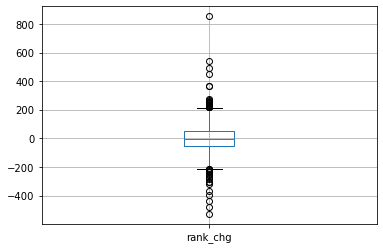

In [9]:
df_score[["rank_chg"]].boxplot()

array([[<AxesSubplot:title={'center':'rank_chg'}>]], dtype=object)

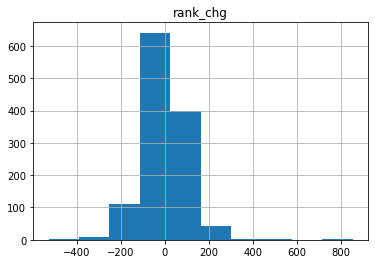

In [10]:
df_score.hist(column='rank_chg')

In [11]:
# compute z-scores of rank changes

from scipy.stats import zscore

df_score["rank_z_score"] = df_score[["rank_chg"]].apply(zscore)

<AxesSubplot:>

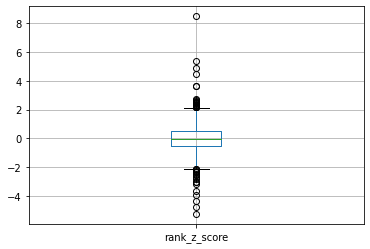

In [12]:
df_score[["rank_z_score"]].boxplot()

In [13]:
#  changes in MSOAs' scores

df_score["score_chg"]= df_score["Score_2011"] - df_score["Score_2001"]

In [14]:
# descriptive stats of score changes
df_score["score_chg"].describe()

count    1211.000000
mean       -0.024424
std         0.123965
min        -0.538701
25%        -0.106693
50%        -0.026266
75%         0.052422
max         0.869562
Name: score_chg, dtype: float64

<AxesSubplot:>

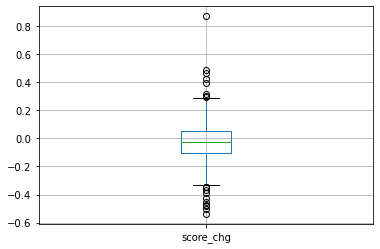

In [15]:
df_score[["score_chg"]].boxplot()

array([[<AxesSubplot:title={'center':'score_chg'}>]], dtype=object)

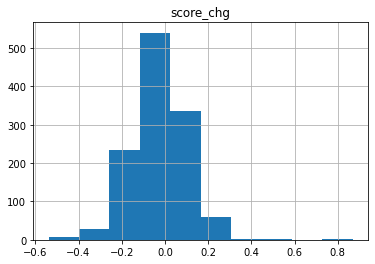

In [16]:
df_score.hist(column='score_chg')

In [17]:
# compute z-scores of score changes

df_score["score_z_score"] = df_score[["score_chg"]].apply(zscore)

<AxesSubplot:>

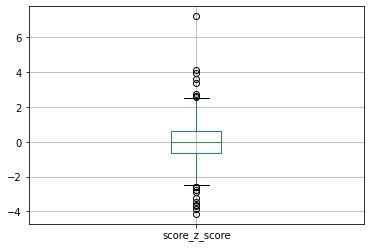

In [18]:
df_score[["score_z_score"]].boxplot()

In [19]:
# checking the top and bottom 5th percentile benchmarks for score changes

print(df_score["score_chg"].quantile(0.95))
print(df_score["score_chg"].quantile(0.05))

0.169519285528103
-0.21049318591632404


In [20]:
##Yee's strategy

# assign MSOA status based on: 
# (1) z-scores of rank changes (z<-1 signify that n'hood is in decline (DEC), -1<z<1 signifies that n'hood is stable (STB), z>1 signifies that n'hood is in ascension (ASC))
# (2) changes in MSOAs' scores are within the top or bottom 5th percentile (top 5th percentile: 'ASC' and bottom 5th percentile: 'DEC')

df_score["status"] = "STB"

for i in range(len(df_score)):
    if df_score["rank_z_score"][i] > 1 or df_score["score_chg"][i] > df_score["score_chg"].quantile(0.95):
        df_score["status"][i] = "ASC"
    elif df_score["rank_z_score"][i] < -1 or df_score["score_chg"][i] < df_score["score_chg"].quantile(0.05):
        df_score["status"][i] = "DEC"

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [21]:
#My strategy

df_score["status2"] = "STB"

for i in range(len(df_score)):
    if df_score["score_z_score"][i]> 1:
        df_score["status2"][i] = "ASC"
    elif df_score["score_z_score"][i]< -1:
        df_score["status2"][i] = "DEC"

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Compared with the classification strategies used by Yee and Dennett (2020), this study does not take into account the rank change of the MSOAs. The reasons are as follows. First, Yee and Dennett (2020) used the absolute value of the variables to score the MSOAs. One extreme situation when using absolute value is that, for all the MSOAs, the 2011 scores are higher than the 2001 score. Considering the extreme situation, it would be reasonable to compare the MSOAs using their ranks, which is a way to identify relative ascending, stable or declining status within the area being studied.  In this study, using the relative value of variables (ratio of the MSOA level to LA level) means it is impossible to have all the MSOA's 2011 score increased compared to its 2001 score. When some MSOAs' 2011 score increase, there must be some MSOAs' 2011 score decrease. Therefore, using score change in this study would not have the same problems that would happen in Yee and Dennett (2020)'s research.  Also, using rank change to score MSOAs in this study has limitations.  Due to the relative comparison nature of the rank, some MSOAs ranked higher in 2011 might have a lower score in 2011. While in this study, when the spatial difference has already been weakened by using the relative variables, a lower score in 2011 theoretically could represent a descending status of an MSOA. Also, identifying the neighbourhood states depending on rank changes is significantly affected by the scope of the research area. For an MSOA,  its rank would change significantly when it is put into different pools of MSOAs. Therefore, using rank change to identify the neighbourhood change status is not an approach that can be scaled up in other scenarios when using relative variables.

In [22]:
# check dataframe
# settings to display all columns
pd.set_option("display.max_columns", None)

df_score.head(10)

,MSOA11CD,ratio_la_median_price_2001,ratio_la_median_price_2011,ratio_la_earnings_2001,ratio_la_earnings_2011,ratio_la_nssec_2001,ratio_la_nssec_2011,ratio_la_qualification_2001,ratio_la_qualification_2011,Score_2001,Score_2011,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,rank_2001,rank_2011,rank_chg,rank_z_score,score_chg,score_z_score,status,status2
0,E02000001,0.002106,0.000000,1,0.296254,1.000000,1.000000,1.000000,1.000000,0.024650,-0.127976,City of London 001,E09000001,City of London,E12000007,London,580.0,717.0,-137.0,-1.364062,-0.152627,-1.034610,DEC,DEC
1,E02000002,0.053292,0.082671,1,0.939117,0.919113,1.004818,0.880126,0.871861,-0.070211,-0.024384,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,692.0,611.0,81.0,0.806489,0.045827,0.566930,STB,STB
2,E02000003,0.229709,0.155645,1,1.111074,1.330238,1.284512,1.275540,1.124038,0.496759,0.364790,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,141.0,216.0,-75.0,-0.746749,-0.131968,-0.867897,STB,STB
3,E02000004,0.186164,0.126294,1,1.067988,1.317318,1.222090,1.005091,0.856399,0.301986,0.140902,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,270.0,428.0,-158.0,-1.573152,-0.161084,-1.102863,DEC,DEC
4,E02000005,-0.000056,-0.030093,1,0.990436,0.991056,0.955399,0.725467,0.842921,-0.149864,-0.115368,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,783.0,704.0,79.0,0.786576,0.034497,0.475495,STB,STB
5,E02000007,-0.022666,-0.103224,1,0.953861,0.851151,0.954006,0.726945,0.845009,-0.240907,-0.158939,Barking and Dagenham 006,E09000002,Barking and Dagenham,E12000007,London,871.0,739.0,132.0,1.314279,0.081968,0.858596,ASC,STB
6,E02000008,-0.070284,-0.061620,1,0.923138,0.843277,0.887238,0.607666,0.778268,-0.342117,-0.224436,Barking and Dagenham 007,E09000002,Barking and Dagenham,E12000007,London,972.0,818.0,154.0,1.533326,0.117681,1.146804,ASC,ASC
7,E02000009,-0.058043,0.005856,1,0.933857,0.930265,0.958089,1.164317,0.938346,0.055367,-0.049730,Barking and Dagenham 008,E09000002,Barking and Dagenham,E12000007,London,546.0,636.0,-90.0,-0.896099,-0.105097,-0.651043,STB,STB
8,E02000010,-0.016883,-0.069755,1,0.942006,0.783554,0.936693,0.582761,0.832560,-0.365451,-0.162565,Barking and Dagenham 009,E09000002,Barking and Dagenham,E12000007,London,997.0,741.0,256.0,2.548905,0.202887,1.834420,ASC,ASC
9,E02000011,-0.022666,0.077483,1,1.072825,1.079197,1.055801,0.841855,0.936510,-0.038820,0.070911,Barking and Dagenham 010,E09000002,Barking and Dagenham,E12000007,London,663.0,502.0,161.0,1.603022,0.109731,1.082647,ASC,ASC


In [23]:
# size of different MSOA status groups

df_score.groupby(df_score["status"]).size()

status
ASC    172
DEC    168
STB    871
dtype: int64

In [24]:

df_score.groupby(df_score["status2"]).size()

status2
ASC    177
DEC    170
STB    864
dtype: int64

In [25]:
df_score_asc=df_score[df_score['status2']=='ASC'].copy()
df_score_dec=df_score[df_score['status2']=='DEC'].copy()
df_score_stb=df_score[df_score['status2']=='STB'].copy()

In [26]:
df_score_asc

,MSOA11CD,ratio_la_median_price_2001,ratio_la_median_price_2011,ratio_la_earnings_2001,ratio_la_earnings_2011,ratio_la_nssec_2001,ratio_la_nssec_2011,ratio_la_qualification_2001,ratio_la_qualification_2011,Score_2001,Score_2011,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,rank_2001,rank_2011,rank_chg,rank_z_score,score_chg,score_z_score,status,status2
6,E02000008,-0.070284,-0.061620,1,0.923138,0.843277,0.887238,0.607666,0.778268,-0.342117,-0.224436,Barking and Dagenham 007,E09000002,Barking and Dagenham,E12000007,London,972.0,818.0,154.0,1.533326,0.117681,1.146804,ASC,ASC
8,E02000010,-0.016883,-0.069755,1,0.942006,0.783554,0.936693,0.582761,0.832560,-0.365451,-0.162565,Barking and Dagenham 009,E09000002,Barking and Dagenham,E12000007,London,997.0,741.0,256.0,2.548905,0.202887,1.834420,ASC,ASC
9,E02000011,-0.022666,0.077483,1,1.072825,1.079197,1.055801,0.841855,0.936510,-0.038820,0.070911,Barking and Dagenham 010,E09000002,Barking and Dagenham,E12000007,London,663.0,502.0,161.0,1.603022,0.109731,1.082647,ASC,ASC
11,E02000013,-0.058043,-0.077957,1,0.971496,0.795779,0.895625,0.553898,0.821029,-0.396442,-0.191046,Barking and Dagenham 012,E09000002,Barking and Dagenham,E12000007,London,1022.0,787.0,235.0,2.339815,0.205396,1.854675,ASC,ASC
12,E02000014,-0.058376,-0.068107,1,0.928608,0.830475,0.848483,0.558368,0.793672,-0.373837,-0.239396,Barking and Dagenham 013,E09000002,Barking and Dagenham,E12000007,London,1005.0,840.0,165.0,1.642849,0.134441,1.282053,ASC,ASC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,E02006854,0.330695,0.274590,1,1.373010,1.427626,1.675048,1.373075,1.566824,0.662711,0.976908,Tower Hamlets 033,E09000030,Tower Hamlets,E12000007,London,81.0,27.0,54.0,0.537660,0.314197,2.732710,ASC,ASC
1203,E02006918,-0.698512,-0.361593,1,0.856374,0.792324,0.766155,0.733452,0.802698,-0.605130,-0.442099,Hackney 028,E09000012,Hackney,E12000007,London,1141.0,1001.0,140.0,1.393932,0.163031,1.512779,ASC,ASC
1207,E02006927,0.019738,0.109976,1,1.009995,1.032484,1.197407,1.110605,1.117053,0.119921,0.265865,Greenwich 034,E09000011,Greenwich,E12000007,London,461.0,308.0,153.0,1.523369,0.145944,1.374887,ASC,ASC
1209,E02006930,0.413581,0.384463,1,1.293101,1.330439,1.583365,1.513893,1.593996,0.733916,0.977763,Greenwich 037,E09000011,Greenwich,E12000007,London,58.0,26.0,32.0,0.318613,0.243847,2.164975,ASC,ASC


In [27]:
df_score_dec

,MSOA11CD,ratio_la_median_price_2001,ratio_la_median_price_2011,ratio_la_earnings_2001,ratio_la_earnings_2011,ratio_la_nssec_2001,ratio_la_nssec_2011,ratio_la_qualification_2001,ratio_la_qualification_2011,Score_2001,Score_2011,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,rank_2001,rank_2011,rank_chg,rank_z_score,score_chg,score_z_score,status,status2
0,E02000001,0.002106,0.000000,1,0.296254,1.000000,1.000000,1.000000,1.000000,0.024650,-0.127976,City of London 001,E09000001,City of London,E12000007,London,580.0,717.0,-137.0,-1.364062,-0.152627,-1.034610,DEC,DEC
3,E02000004,0.186164,0.126294,1,1.067988,1.317318,1.222090,1.005091,0.856399,0.301986,0.140902,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,270.0,428.0,-158.0,-1.573152,-0.161084,-1.102863,DEC,DEC
10,E02000012,0.382032,0.348427,1,1.053097,1.448029,1.268548,1.368499,1.188615,0.697075,0.478013,Barking and Dagenham 011,E09000002,Barking and Dagenham,E12000007,London,71.0,158.0,-87.0,-0.866229,-0.219061,-1.570745,DEC,DEC
15,E02000017,0.173700,0.260270,1,0.966556,1.381274,1.122787,2.116899,1.423413,1.014252,0.475551,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,14.0,160.0,-146.0,-1.453672,-0.538701,-4.150277,DEC,DEC
20,E02000022,-0.064442,-0.245364,1,0.861845,0.795332,0.823179,1.357417,1.201176,0.092670,-0.106261,Barking and Dagenham 021,E09000002,Barking and Dagenham,E12000007,London,499.0,698.0,-199.0,-1.981375,-0.198931,-1.408291,DEC,DEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,E02004193,-0.311685,-0.331157,1,0.834118,1.175214,0.944605,0.849314,0.853308,-0.121756,-0.297799,South Hams 005,E07000044,South Hams,E12000009,South West,749.0,888.0,-139.0,-1.383976,-0.176043,-1.223581,DEC,DEC
1161,E02004218,0.165605,0.043256,1,0.904146,1.087498,1.001330,0.956566,0.922286,0.129399,-0.022515,Teignbridge 018,E07000045,Teignbridge,E12000009,South West,452.0,607.0,-155.0,-1.543282,-0.151914,-1.028856,DEC,DEC
1189,E02006793,-0.455268,-0.551804,1,0.691080,0.671788,0.613069,0.883327,0.696895,-0.462545,-0.725005,Enfield 037,E09000010,Enfield,E12000007,London,1066.0,1160.0,-94.0,-0.935926,-0.262460,-1.920978,DEC,DEC
1200,E02006853,0.294506,0.019976,1,0.972469,1.427626,1.326334,1.373075,1.267554,0.644813,0.379953,Tower Hamlets 032,E09000030,Tower Hamlets,E12000007,London,86.0,207.0,-121.0,-1.204756,-0.264860,-1.940349,DEC,DEC


In [28]:
# output to file
df_score.to_csv('output_new/pcascore_analysis_new.csv',index=False)

In [29]:
#![alt text](LONDON-RESULTS.png "Title")